# IT44 TP2: Interpolation polynomiale
---

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/interpolation.png'  width="500px">
            
    </tr>
</table>

Dans ce second TP vous allez implémenter la plupart des procédures vues en cours et TD concernant le chapitre 1 sur l'interpolation polynomiale. Une fois implémenter des algorithmes permettant de construire le polynôme d'interpolation, vous ferez des tests et appliquerez vos résultats à des cas concret.



## Evaluation de polynômes

Dans un premier temps on s'intéresse à l'évaluation des polynômes.
1. Ecrire une première fonction ```Eval(C,A,t)``` qui étant donnée un vecteur de $n+1$ valeurs $(a_0,\dots,a_{n})$, un vecteur de $n$ centres $(c_1,\dots, c_n)$ et une valeur $t\in \mathbb{R}$, calcule
$$p(t)=a_0+a_1\times(t-c_1)+a_2(t-c_1)(t-c_2)+\dots a_n \prod_{i=1}^n (t-c_i)$$
Cette première fonction calculera cette évaluation de la manière la plus naïve possible en calculant:
$$p(t)=\sum_{i=0}^n a_i \prod_{j=1}^i (t-c_j).$$
(on adoptera la convention suivante: $\prod_{j=1}^0=1$.
2. Proposer une seconde fonction ```EvalH(C, A,t)``` qui utilise l'algorithme de Hörner vue en cours.
3. Mesurer et comparer les temps d'execution des deux algorithmes. Pour cela vous pourrez utiliser la séquence suivante et faire des tests sur des polynômes choisis aléatoirement:
```Python
import time
start_time = time.time()
main()
print("---%s seconds ---" % (time.time() - start_time))
```

####Question 1

In [2]:
def Eval(C, A, t):
  res = 0

  for i in range(0, len(A), 1):
    s = A[i]
    for j in range(i):
      s = s * (t - C[j])
    res = res + s
  return res

In [ ]:
C=[0,0]
A=[1,1,1]
t = 2

Eval(C, A, t)

7

####Question 2

In [3]:
def EvalH(C, A, t):
    n = len(A)-1
    s = A[n]
    for i in range(n-1, -1, -1):
        s = (s * (t-C[i])) + A[i]
    return s

In [ ]:
C=[0,0]
A=[1,1,1]
t = 2

EvalH(C, A, t)

7

####Question 3 : Comparaison

In [ ]:
import time
import random

def Eval(C, A, t):

  n = len(A) - 1
  p = A[0]
  for i in range(1, n + 1):
    prod = 1
    for j in range(i):
      prod *= (t - C[j])
    p += A[i] * prod
  return p

def EvalH(C, A, t):

  n = len(A) - 1
  p = A[n]
  for i in range(n - 1, -1, -1):
    p = A[i] + (t - C[i]) * p
  return p

def main():
  n = 10
  C = [random.uniform(0, 1) for _ in range(n)]
  A = [random.uniform(0, 1) for _ in range(n + 1)]
  t = 0.5

  # Test Eval function
  result_eval = Eval(C, A, t)
  print(f"Eval Result: {result_eval}")

  # Test EvalH function
  result_evalh = EvalH(C, A, t)
  print(f"EvalH Result: {result_evalh}")


# Mesure temps pour l'algorithme naive
start_time = time.time()
main()
print("--- Eval Time: %s seconds ---" % (time.time() - start_time))

print("")

# Mesure temps pour l'algorithme de Horner
start_time = time.time()
main() #calling main again for EvalH timing
print("--- EvalH Time: %s seconds ---" % (time.time() - start_time))


Eval Result: 0.5143535926887975
EvalH Result: 0.5143535926887974
--- Eval Time: 0.00023484230041503906 seconds ---

Eval Result: 1.0340007552140196
EvalH Result: 1.0340007552140191
--- EvalH Time: 8.893013000488281e-05 seconds ---


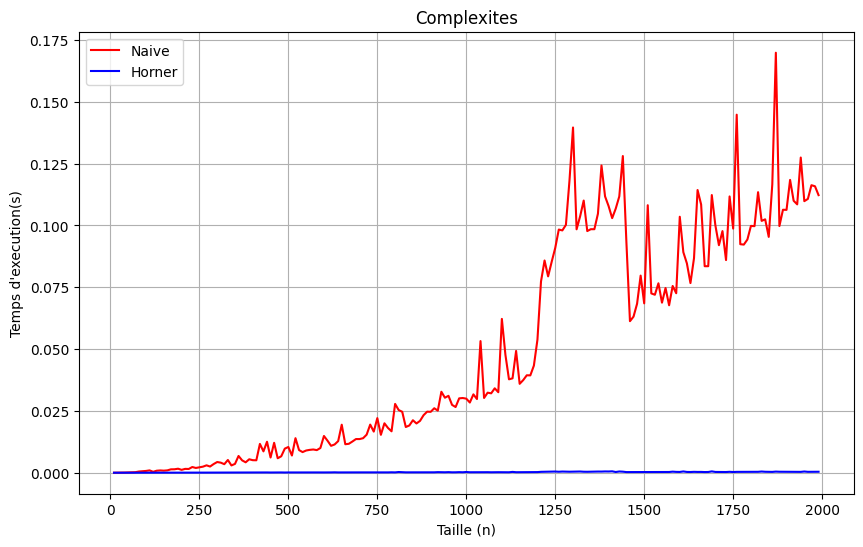

In [14]:
import time
import random
import matplotlib.pyplot as plt

data_sizes = []
naive_time = []
horner_time = []

for i in range(10, 2000, 10):  # Adjusted data size range and step
    data_sizes.append(i)

    A = [random.randint(0, 100) for _ in range(i)]
    C = [random.randint(0, 100) for _ in range(i)]
    t = 2

    start_time = time.time()
    Eval(C, A, t)
    naive_time.append(time.time() - start_time)

    start_time = time.time()
    EvalH(C, A, t)
    horner_time.append(time.time() - start_time)


plt.figure(figsize=(10, 6))
plt.plot(data_sizes, naive_time, "-r", label="Naive")
plt.plot(data_sizes, horner_time, "-b", label="Horner")
plt.xlabel("Taille (n)")
plt.ylabel("Temps d'execution(s)")
plt.title("Complexites")
plt.legend()
plt.grid(True)
plt.show()


## Table des différences divisées

Ecrire un code ```Tab_diff_div(X,Y)``` qui étant donnée un vecteur représentant $n+1$ points de support $X=(x_0,\dots, x_n)$ et les valeurs correspondantes $(y_0,\dots y_n)$ calcule le vecteur des différences divisées correspondant.

In [ ]:
import numpy as np

def Tab_diff_div(X, Y):
  n = len(X)
  F = np.zeros((n,n))
  for k in range(n):
    F[k][0] = Y[k]

  for j in range(1, n):
    for i in range(n-j):
      F[i][j] = (F[i+1][j-1] - F[i][j-1])/(X[i+j] - X[i])

  return F

In [ ]:
X = [1, 2, 3]
Y = [1, 4, 9]

F = Tab_diff_div(X, Y)
print(F)

[[1. 3. 1.]
 [4. 5. 0.]
 [9. 0. 0.]]


In [ ]:
X = [1, 2, 4]
Y = [4, -1, 2]

F = Tab_diff_div(X, Y)
print(F)

[[ 4.         -5.          2.16666667]
 [-1.          1.5         0.        ]
 [ 2.          0.          0.        ]]


## Polynôme d'interpolation

1. Ecrire une fonction ```valf(X)``` qui pour un vecteur $X=\{x_0,\dots,x_n\}$renvoie le vecteur $Y=\{y_0,\dots,y_n\}$ tel que $y_i=f(x_i)$ (on pourra choisir $f(x)=\exp(x)$).
2. Ecrire une fonction ``` Interpol(n,X,Y)``` qui, à partir de l'entier naturel non nul $n$ et des données $X=(x_0,\dots,x_n)$ et $Y=(y_0,\dots,y_n)$ représentant respectivement des points de support $x_i$ et leurs images $y_i=f(x_i)$ produit le polynôme d'interpolation $p$ de degré $n$ tel que $p(x_i)=y_i$, sous la forme $P=[P[0],P[1]]$ où $P[0]$ est le vecteur des centres de la base de Newton et $P[1]$ est le vecteur des coefficients correspondant.

####Question 1

In [ ]:
import numpy as np
import math

def valf(X):

  n = len(X)
  Y = np.zeros((n, 1)) # vecteur ligne

  for i in range(n):
    Y[i] = math.exp(X[i]) # y = f(exp(x))

  return Y

In [ ]:
X = [0, 1, 2, 3]
print(valf(X))

[[ 1.        ]
 [ 2.71828183]
 [ 7.3890561 ]
 [20.08553692]]


####Question 2

In [ ]:
import numpy as np

def Interpol(n, X, Y):

  P = np.zeros((2, n))  # Initialisation du tableau P
  P[1] = Y.copy()  # Initialisation avec les valeurs de Y

  for j in range(1, n):
    for i in range(n - 1, j - 1, -1):
      P[1][i] = (P[1][i] - P[1][i - 1]) / (X[i] - X[i - j])

  # Stockage des points de support dans P[0]
  P[0] = X.copy()

  return P

In [ ]:
X = [1, 2, 4]
Y = [4, -1, 2]
n = 3

print(Interpol(n, X, Y))

[[ 1.          2.          4.        ]
 [ 4.         -5.          2.16666667]]


## Applications

1. Utiliser les codes ci-dessus pour construire $p_{8,1}$ le polynôme d'interpolation de la fonction $\exp$ sur le support $X_1$ équiréparti tel que $x_0=-1, x_1=-\frac{3}{4},\dots,x_8=1$.
2. Utiliser les codes ci-dessus pour constuire $p_{8,2}$, le polynôme d'interpolation de la fonction $\exp$ sur le support $X_2$ définit par les huits points de Tchebyschev:
$$\forall j\in \{0,\dots,8\}, X_2[j]=\cos(\dfrac{(2j+1)\pi}{18})$$
3. Visualiser graphiquement l'erreur commise en valeur absolue lors de l'approximation de la fonction $\exp$ par $p_{8,1}$ et $p_{8,2}$.

####Question 1

In [ ]:
import math
import numpy as np

def valf(X):

  n = len(X)
  Y = np.zeros((n, 1)) # vecteur ligne

  for i in range(n):
    Y[i] = math.exp(X[i]) # y = f(exp(x))

  return Y

def Interpol(n, X, Y):

  P = np.zeros((2, len(X)))

  # Calcul des différences divisées et stockage dans P[1]
  P[1] = Y.copy().flatten()
  for j in range(1, len(X)):
    for i in range(len(X) - 1, j - 1, -1):
      P[1][i] = (P[1][i] - P[1][i - 1]) / (X[i] - X[i - j])

  # Stockage des points de support dans P[0]
  P[0] = X.copy()

  return P

X = [-1, 0 , 1]
Y = valf(X)
n = 2

P_1 = Interpol(n, X, Y)
print(P_1)

[[-1.          0.          1.        ]
 [ 0.36787944  0.63212056  0.54308063]]


####Question 2

In [ ]:
def Interpol(n, X, Y):

  P = np.zeros((2, len(X)))

  # Calcul des différences divisées et stockage dans P[1]
  P[1] = np.array(Y).flatten()
  for j in range(1, n):
    for i in range(n - 1, j - 1, -1):
      P[1][i] = (P[1][i] - P[1][i - 1]) / (X[i] - X[i - j])

  # Stockage des points de support dans P[0]
  P[0] = X.copy()

  return P

X_2 = [math.cos((2*j+1)*math.pi/6) for j in range (0,3,1)]
Y_2  = valf(X_2)
n = 2

P2 = Interpol(n, X_2, Y_2)
print(P2)

[[ 8.66025404e-01  6.12323400e-17 -8.66025404e-01]
 [ 2.37744268e+00  1.59053380e+00  4.20620026e-01]]


####Question 3

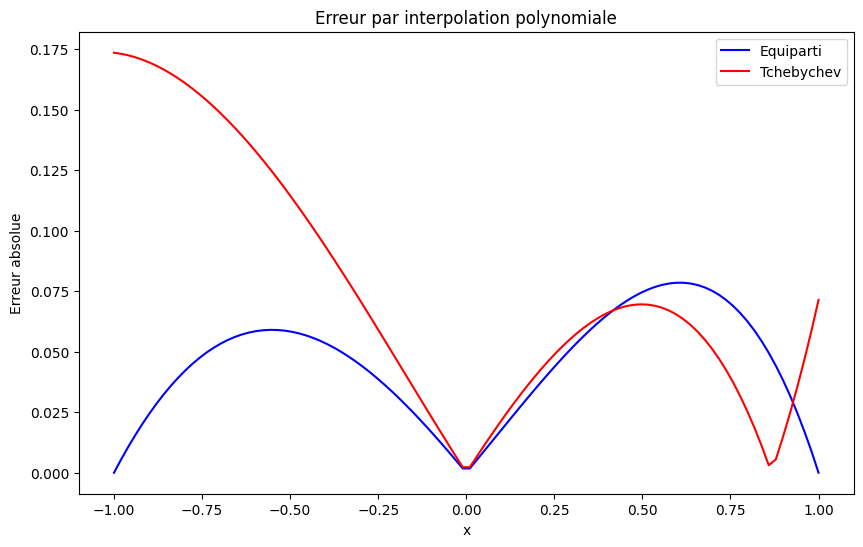

In [ ]:
# import math
# import numpy as np
# import matplotlib.pyplot as plt

# def exp_func(x):
#     return math.exp(x)

# def eval_p8_1(x):
#     return Eval(P_1[0], P_1[1], x)

# def eval_p8_2(x):
#     return Eval(P_2[0], P_2[1], x)

# x_values = np.linspace(-1, 1, 100)


# #Calcul l'erreur
# errors_p8_1 = [abs(exp_func(x) - eval_p8_1(x)) for x in x_values]
# errors_p8_2 = [abs(exp_func(x) - eval_p8_2(x)) for x in x_values]

# plt.figure(figsize=(10, 6))
# plt.plot(x_values, errors_p8_1, '-b',label='Equiparti')
# plt.plot(x_values, errors_p8_2, '-r',label='Tchebychev')
# plt.xlabel('x')
# plt.ylabel('Erreur absolue')
# plt.title('Erreur par interpolation polynomiale')
# plt.legend()
# plt.show()

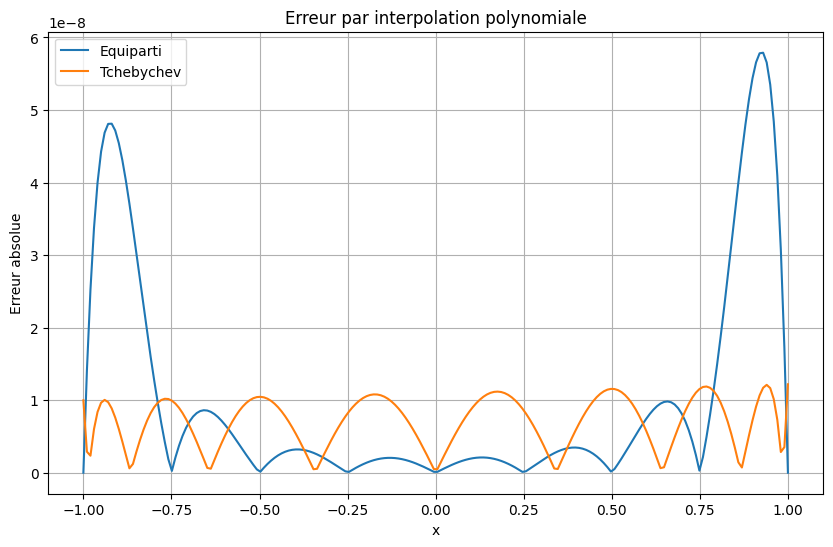

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n1 = 9
X1 = [-1, -3/4, -1/2, -1/4, 0, 1/4, 1/2, 3/4, 1]
Y1 = valf(X1)
P1 = Interpol(n1, X1, Y1)

n2 = 9
X2 = np.cos([(2*j + 1)*np.pi/18 for j in range(n2)])
Y2 = valf(X2)
P2 = Interpol(n2, X2, Y2)

x_values = np.linspace(-1, 1, 200)


err1 = []
for x in x_values:
    err1.append(abs(np.exp(x) - EvalH(P1[0], P1[1], x)))


err2 = []
for x in x_values:
    err2.append(abs(np.exp(x) - EvalH(P2[0], P2[1], x)))


plt.figure(figsize=(10, 6))
plt.plot(x_values, err1, label="Equiparti")
plt.plot(x_values, err2, label="Tchebychev")
plt.xlabel("x")
plt.ylabel("Erreur absolue")
plt.title("Erreur par interpolation polynomiale")
plt.legend()
plt.grid(True)
plt.show()

## Généralisation

Généraliser ce qui précède pour construire le polynôme d'interpolation d'une fonction $f$ pour un support quelconque (i.e. en autorisant la répétition des points). On supposera que l'on sait dériver $f$ et on pourra construire une fonction ```valdf(\tilde{X})```qui retourne le vecteur des valeurs de la dérivée de $f$ pour un support extrait de $X$.

## Phénomène de Runge

On considère la fonction $f(x)=\dfrac{1}{1+25x^2}$ pour $x\in [-1,1]$ et on considère les supports $X_n=\{x_0,\dots,x_n\}$ tels que $x_0=-1, x_n=1$ et $x_{i+1}=x_i+h$ avec $h=\frac{2}{n}$.

Tracer sur le même graphique la fonction $f$ et plusieurs polynôme d'intepolation $p_n$ pour différentes valeurs de $n$. Qu'observez-vous ?

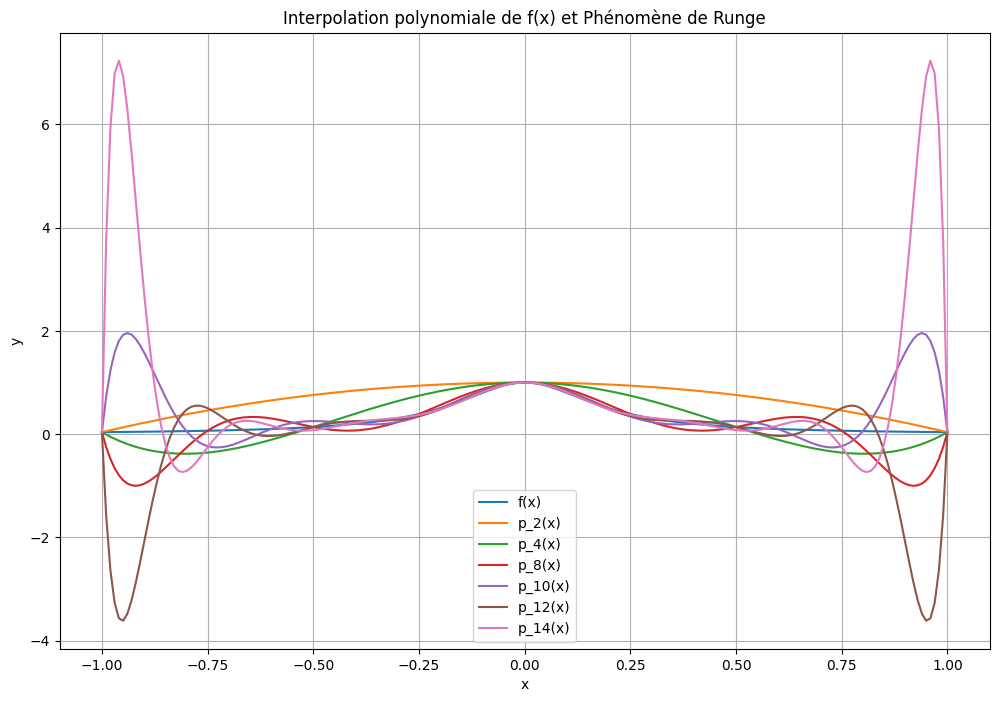

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return 1 / (1 + 25 * x**2)


def EvalH(C, A, t):
    n = len(A)-1
    s = A[n]
    for i in range(n-1, -1, -1):
        s = (s * (t-C[i])) + A[i]
    return s

def Interpol(n, X, Y):
  P = np.zeros((2, len(X)))

  P[1] = np.array(Y).flatten()
  for j in range(1, len(X)):
    for i in range(len(X) - 1, j - 1, -1):
      P[1][i] = (P[1][i] - P[1][i - 1]) / (X[i] - X[i - j])
  P[0] = X.copy()
  return P


x_values = np.linspace(-1, 1, 200)
y_values = [f(x) for x in x_values]

plt.figure(figsize=(12, 8))
plt.plot(x_values, y_values, label='f(x)')

# Different polynome d'interpolation
for n in [2, 4, 8, 10, 12, 14]:
  h = 2 / n
  X = [-1 + i * h for i in range(n + 1)]
  Y = [f(x) for x in X]
  P = Interpol(n, X, Y)

  y_interp = [EvalH(P[0], P[1], x) for x in x_values]

  plt.plot(x_values, y_interp, label=f'p_{n}(x)')



plt.xlabel('x')
plt.ylabel('y')
plt.title("Interpolation polynomiale de f(x) et Phénomène de Runge")
plt.legend()
plt.grid(True)
plt.show()

####Conclusion : En augmentant le nombre des points à interpoler, la fonction polynôme d'interpolation se met à osciller entre les points du support, on aura l'erreur d'interpolation qui tend vers ∞. Donc, on n'est de moins en moins approcher la fonction origine.